In [6]:
DATA = './hadoop15.csv'

packets=[]
with open(DATA, 'r') as f:
    for line in f:
        key, _, global_time, _ = line.strip().split(',')
        key = int(key)
        global_time = int(global_time)
        packets.append((key, global_time))

class Flow:
    def __init__(self, id):
        self.id = id
        self.counter = 0

    def __lt__(self, other):
        return self.counter > other.counter

f = [Flow(i) for i in range(5000)]

for pkt in packets:
    key, _ = pkt
    f[key].counter += 1

f = sorted(f)

k = 0
for i in f:
    if k < 20:
        print(i.id)
        k += 1



2
132
209
264
482
549
768
1013
1028
1431
1523
1839
1857
1921
1938
2194
2275
2301
2316
2366


[0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 11, 10, 10, 11, 11, 10, 10, 11, 10, 11, 10, 11, 10, 10, 11, 10, 10, 11, 10, 10, 11, 11, 11, 10, 11, 11, 10, 11, 11, 10, 11, 11, 11, 11, 10, 11, 11, 11, 11, 10, 11, 11, 11, 11, 10, 10, 11, 11, 11, 11, 10, 11, 10, 11, 10, 10, 11, 10, 11, 10, 11, 11, 10, 11, 10, 10, 11, 10, 10, 10, 11, 10, 10, 11, 11, 10, 10, 11, 10, 10, 11, 11, 10, 10, 11, 10, 10, 11, 10, 10, 11, 11, 10, 10, 11, 10, 10, 11, 10, 10, 10, 11, 10, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

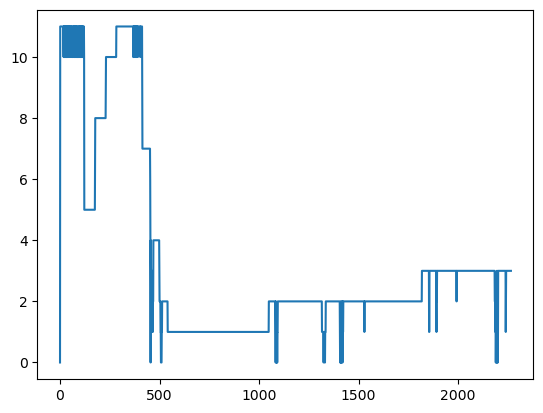

In [9]:
import matplotlib.pyplot as plt
counters = []
i = 0
time_stamp = 0
for pkt in packets:
    key, time = pkt
    if key == 2:
        if time - time_stamp > 1000:
            counters.append(i)
            time_stamp = time
            i = 0
        else:
            i += 1

print(counters)
plt.plot(counters)
plt.show()

In [1]:
import numpy as np

np.random.seed(42)  # 保证结果可复现

# 生成基本平稳数据（均值100，标准差3）
normal_data = np.random.normal(loc=100, scale=3, size=60)

# 随机挑选 4 个位置插入异常值
anomaly_indices = np.random.choice(60, size=4, replace=False)

# 插入异常值（上下偏离20左右）
for i in anomaly_indices:
    normal_data[i] += np.random.choice([20, -20])

# 输出数据
print("数据点（带异常）:\n", np.round(normal_data, 2).tolist())
print("\n异常点索引：", anomaly_indices.tolist())


数据点（带异常）:
 [101.49, 99.59, 101.94, 104.57, 99.3, 99.3, 104.74, 82.3, 98.59, 101.63, 98.61, 118.6, 100.73, 94.26, 94.83, 98.31, 96.96, 100.94, 97.28, 95.76, 104.4, 99.32, 100.2, 95.73, 98.37, 100.33, 96.55, 101.13, 78.2, 99.12, 98.19, 105.56, 99.96, 96.83, 102.47, 96.34, 100.63, 94.12, 96.02, 100.59, 102.22, 100.51, 119.65, 99.1, 95.56, 97.84, 98.62, 103.17, 101.03, 94.71, 100.97, 98.84, 97.97, 101.84, 103.09, 102.79, 97.48, 99.07, 100.99, 102.93]

异常点索引： [28, 42, 7, 11]
